In [42]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# needed for k-prototypes clustering algorithm
from kmodes.kprototypes import KPrototypes


In [44]:
df = pd.read_csv('age_education.csv')
df.head()

,age,education
0,27.007219,college
1,47.615409,highschool
2,51.382815,highschool
3,54.906622,highschool
4,27.719939,less_than_highschool


In [45]:
df['education'].unique()

array(['college', 'highschool', 'less_than_highschool'], dtype=object)

In [46]:
# Standardize all numerical variables

df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()
df.head()

,age,education,z_age
0,27.007219,college,-1.446258
1,47.615409,highschool,0.438698
2,51.382815,highschool,0.783290
3,54.906622,highschool,1.105599
4,27.719939,less_than_highschool,-1.381068


In [47]:
df.values

array([[27.0072187412, 'college', -1.4462580541682948],
       [47.615408975600005, 'highschool', 0.4386984980527457],
       [51.382815347299996, 'highschool', 0.7832895196050051],
       ...,
       [52.828646643599996, 'highschool', 0.9155344738862257],
       [54.411223276899996, 'highschool', 1.0602870290791249],
       [48.4817187505, 'less_than_highschool', 0.517936716832631]],
      dtype=object)

Import `Kprototypes` from the `kmodes` module (make sure to install `kmodes` in case it is not). The `kmodes` module expects `numpy` matrices rather than `pandas` DataFrames, so convert the standardized age and education columns as a matrix in the X variable by using the values function. 



In [48]:
X = df[['z_age','education']].values
X.shape

(1000, 2)

In [49]:
X

array([[-1.4462580541682948, 'college'],
       [0.4386984980527457, 'highschool'],
       [0.7832895196050051, 'highschool'],
       ...,
       [0.9155344738862257, 'highschool'],
       [1.0602870290791249, 'highschool'],
       [0.517936716832631, 'less_than_highschool']], dtype=object)

Perform k-prototypes clustering using three clusters, specifying the education column (in column index 1) as categorical, and save the result of the clustering as a new column called cluster:

In [50]:
# create k-prototype clustering model
kp = KPrototypes(n_clusters = 3)

df['cluster'] = kp.fit_predict(X,categorical = [1])

In [51]:
df.head()

,age,education,z_age,cluster
0,27.007219,college,-1.446258,0
1,47.615409,highschool,0.438698,2
2,51.382815,highschool,0.783290,2
3,54.906622,highschool,1.105599,2
4,27.719939,less_than_highschool,-1.381068,0


**Note**: If all variables were categorical, we would use k-modes instead of k-prototypes clustering. The code would be the same, except all references to kprototypes would be changed to kmodes. 

In [52]:
df.groupby(['cluster','education']).agg({'cluster':'count', 'age':'mean'})

cluster        age
cluster education                               
0       college                   282  28.991106
        highschool                  6  37.095325
        less_than_highschool       56  29.253280
1       college                    22  47.018588
        less_than_highschool      277  49.871551
2       college                    30  52.842083
        highschool                327  49.996297

In [53]:
# get dummy variables for our categorical variable 

pd.get_dummies(df['education'])

,college,highschool,less_than_highschool
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
995,0,0,1
996,1,0,0
997,0,1,0
998,0,1,0


In [54]:
df.head()

,age,education,z_age,cluster
0,27.007219,college,-1.446258,0
1,47.615409,highschool,0.438698,2
2,51.382815,highschool,0.783290,2
3,54.906622,highschool,1.105599,2
4,27.719939,less_than_highschool,-1.381068,0


In [55]:
df = pd.concat([df, pd.get_dummies(df['education'])],axis = 1 )

In [56]:
df.head()

,age,education,z_age,cluster,college,highschool,less_than_highschool
0,27.007219,college,-1.446258,0,1,0,0
1,47.615409,highschool,0.438698,2,0,1,0
2,51.382815,highschool,0.783290,2,0,1,0
3,54.906622,highschool,1.105599,2,0,1,0
4,27.719939,less_than_highschool,-1.381068,0,0,0,1


In [57]:
cluster_df = df.groupby('cluster').agg({'age':'mean',
                                         'college':'mean',
                                         'highschool':'mean',
                                         'less_than_highschool':'mean'})

In [58]:
cluster_df.head()

,age,college,highschool,less_than_highschool
cluster,,,,
0,29.175138,0.819767,0.017442,0.162791
1,49.661634,0.073579,0.000000,0.926421
2,50.235438,0.084034,0.915966,0.000000


In [59]:
cluster_df.reset_index(inplace=True)

In [60]:
cluster_df

,cluster,age,college,highschool,less_than_highschool
0,0,29.175138,0.819767,0.017442,0.162791
1,1,49.661634,0.073579,0.000000,0.926421
2,2,50.235438,0.084034,0.915966,0.000000


In [61]:
cluster_df = cluster_df.melt(id_vars = ['cluster','age'], var_name = "education", value_name = "proportion")

In [62]:
cluster_df

,cluster,age,education,proportion
0,0,29.175138,college,0.819767
1,1,49.661634,college,0.073579
2,2,50.235438,college,0.084034
3,0,29.175138,highschool,0.017442
4,1,49.661634,highschool,0.000000
5,2,50.235438,highschool,0.915966
6,0,29.175138,less_than_highschool,0.162791
7,1,49.661634,less_than_highschool,0.926421
8,2,50.235438,less_than_highschool,0.000000


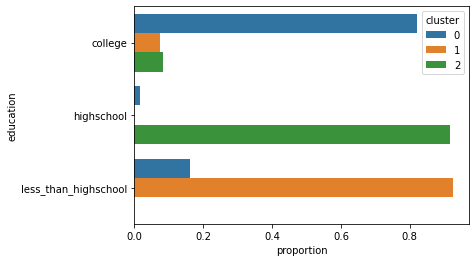

In [63]:
sns.barplot(data=cluster_df,y='education', x='proportion',hue='cluster')

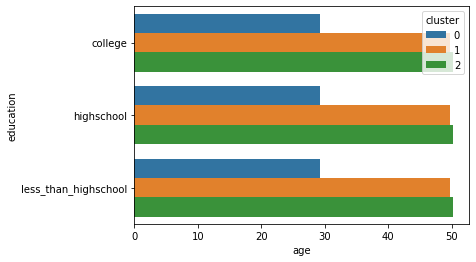

In [64]:
sns.barplot(data=cluster_df,y='education', x='age',hue='cluster')